## Задача 1

1. Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
2. Считать данные с помощью pandas
3. Вывести на экран первые 5 строк


In [40]:
import pandas as pd

df = pd.read_csv('laptops_10.csv', sep = (','))
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### 1.1 Изучите количество памяти с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

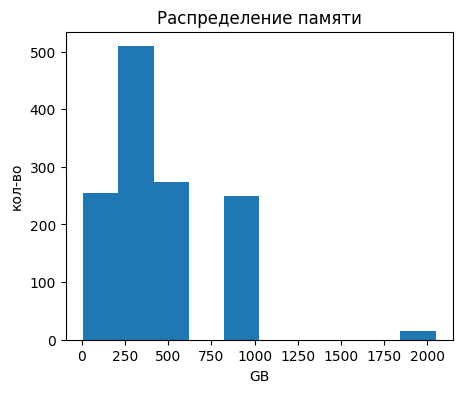

In [41]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5, 4))
plt.hist(df['Memory_Amount'])
plt.title('Распределение памяти')
plt.xlabel('GB')
plt.ylabel('кол-во');


### 1.2 Изучите стоимость ноутбуков с помощью matplotlib
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

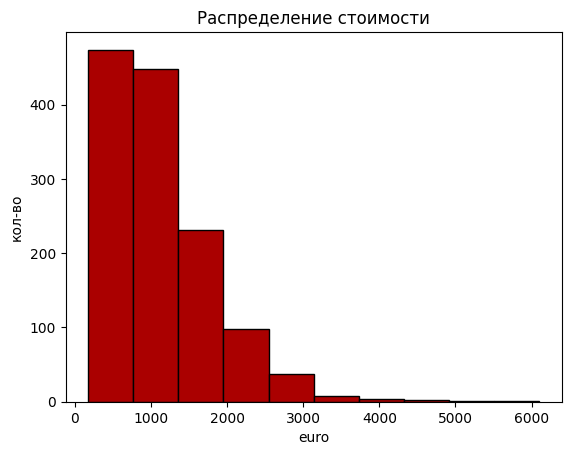

In [42]:
plt.hist(df['Price_euros'], edgecolor='black', color='#AA0000')
plt.title('Распределение стоимости')
plt.xlabel('euro')
plt.ylabel('кол-во');

### Задача 2

### 2.1 Изучите распределение типов носителя
Постройте график
Сделайте выводы

In [43]:
data = df['Memory_Type'].value_counts()
data

Memory_Type
SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: count, dtype: int64

In [44]:
names = data.index
values = data.values

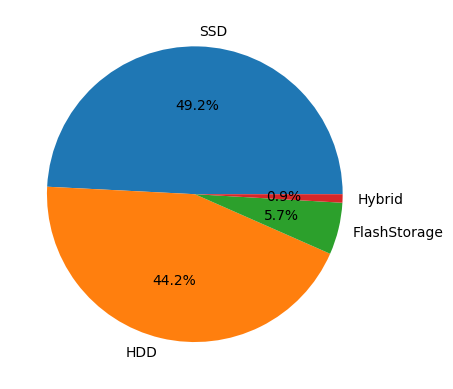

In [45]:
plt.pie(values, labels=names, autopct='%.1f%%');



### 2.2 Изучите распределение компаний производителей¶
Постройте график
Сделайте выводы

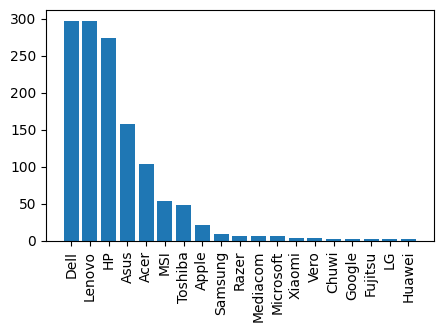

In [46]:
data = df['Company'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(5, 3))
plt.bar(names, values)
plt.xticks(rotation=90);

### 2.3 Изучите распределение операционной системы
Постройте график
Сделайте выводы

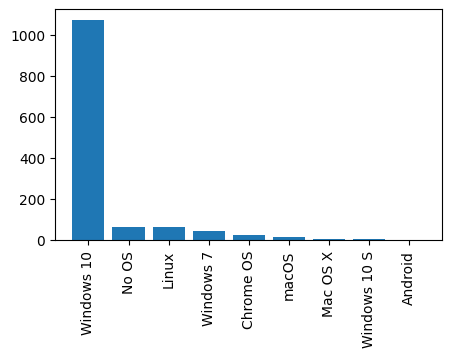

In [47]:
data = df['OpSys'].value_counts()
names = data.index
values = data.values
plt.figure(figsize=(5, 3))
plt.bar(names, values)
plt.xticks(rotation=90);

### 2.4 Изучите распределение компаний производителей CPU
Постройте график
Сделайте выводы


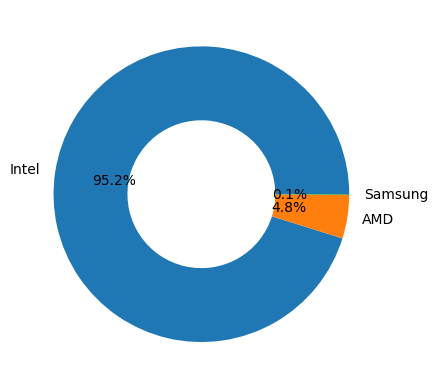

In [48]:
data = df['Cpu_Company'].value_counts()
names = data.index
values = data.values
plt.pie(values, labels=names, autopct='%.1f%%', wedgeprops=dict(width=0.5));

### Задача 3

Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте


### 3.1 Постройте график в абсолютных величинах

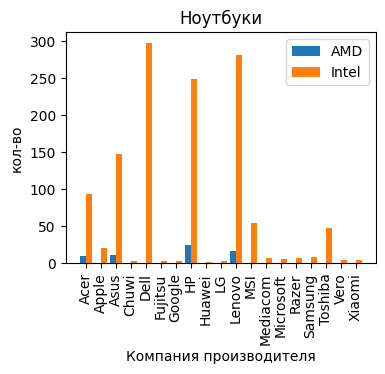

In [49]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
import numpy as np

plt.figure(figsize=(4, 3))
n_ticks = np.arange(len(data['AMD']))
offset = 0.2
w = 0.4

plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)

plt.title('Ноутбуки')
plt.xlabel('Компания производителя')
plt.ylabel('кол-во')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=90);

### 3.2 Постройте график в относительных величинах

In [50]:
data = pd.crosstab(index=df['Company'], columns=df['Cpu_Company'], normalize = 'index')
data = data.drop(columns=['Samsung']).reset_index()

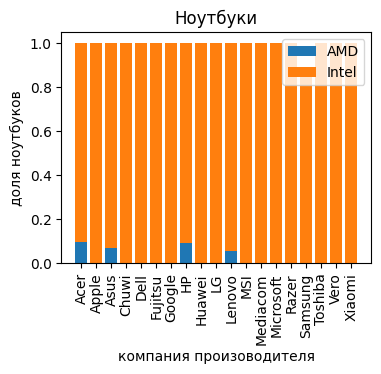

In [51]:
plt.figure(figsize=(4, 3))

plt.bar(data['Company'], data['AMD'])
plt.bar(data['Company'], data['Intel'], bottom=data['AMD'])

plt.title('Ноутбуки')
plt.xlabel('компания произоводителя')
plt.ylabel('доля ноутбуков')
plt.legend(['AMD', 'Intel'])
plt.xticks(rotation=90);

## Задача 4

### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


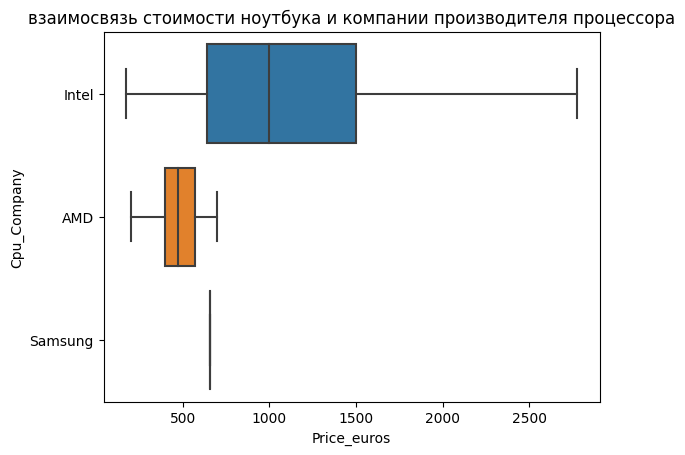

In [52]:
import seaborn as sns

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False)

plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company')
plt.title('взаимосвязь стоимости ноутбука и компании производителя процессора');

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

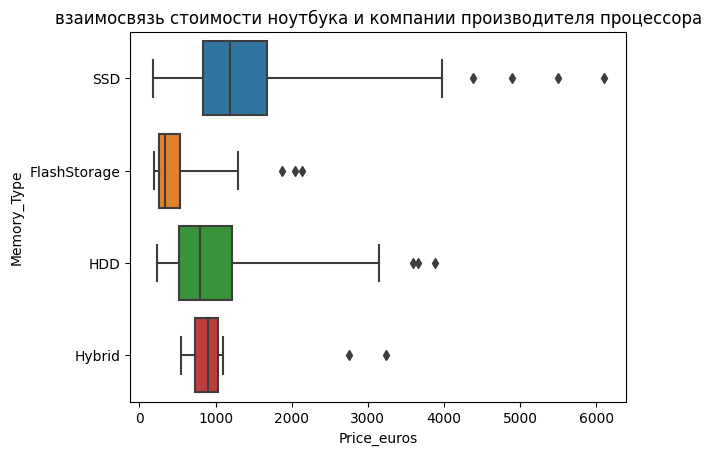

In [53]:
sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], whis = 3)

plt.xlabel('Price_euros')
plt.ylabel('Memory_Type')
plt.title('взаимосвязь стоимости ноутбука и компании производителя процессора');

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

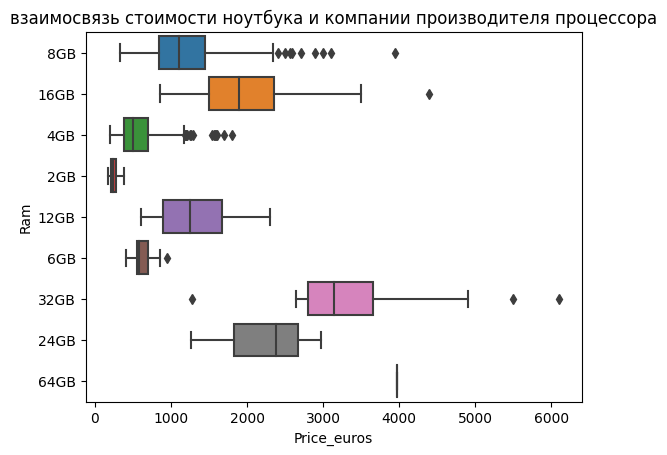

In [54]:
sns.boxplot(x=df['Price_euros'], y=df['Ram'], whis = 1.5)

plt.xlabel('Price_euros')
plt.ylabel('Ram')
plt.title('взаимосвязь стоимости ноутбука и компании производителя процессора');

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя 

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

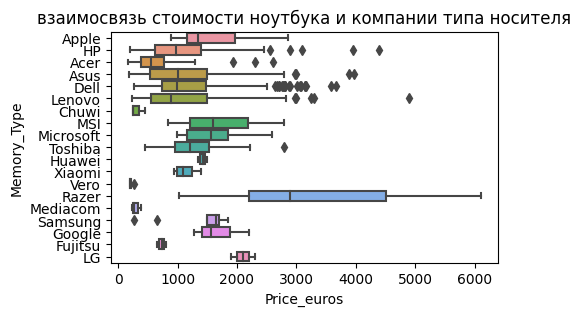

In [55]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df['Price_euros'], y=df['Company'], whis=1.5)
plt.xlabel('Price_euros')
plt.ylabel('Memory_Type')
plt.title('взаимосвязь стоимости ноутбука и компании типа носителя');

## Задача 5*

Постройте матрицу корреляций для таблицы


In [57]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

ValueError: could not convert string to float: 'Apple'

In [ ]:
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

### Задание 6

In [ ]:
df = pd.read_csv('kc_house_data.csv', sep = (','))

import folium

this_map = folium.Map(perfer_canvas=True)

def plotDot(point):
    folium.CircleMarker(
    location=[point.lat, point.long], 
    radius = 2,
    popup=[point.price, point.floors]).add_to(this_map)
    
df.apply(plotDot, axis=1)
this_map.fit_bounds(this_map.get_bounds())

this_map

In [ ]:
# Для того что бы сохранить файл в формате excel на пк !
#df = pd.read_csv('kc_house_data.csv', sep=',')
#df.head()
#df.to_excel(r'C:\Users\Home\Desktop\1.xlsx')
